# Exercise 0.1 Recreation of graphs

In [16]:
import pandas as pd

df = pd.read_csv('data/Steam Top 100 Played Games - List.csv')
df.head()

,Rank,Name,Thumbnail URL,Store Link,Price,Current Players,Peak Today,Genre Tags
0,1,Counter-Strike 2,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/730/Counter...,Free To Play,"1,485,535","1,489,929","FPS, Shooter, Multiplayer, Competitive, Action..."
1,2,PUBG: BATTLEGROUNDS,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/578080/PUBG...,Free To Play,"765,150","765,150","Survival, Shooter, Battle Royale, Multiplayer,..."
2,3,Dota 2,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/570/Dota_2?...,Free To Play,"698,757","715,295","Free to Play, MOBA, Multiplayer, Strategy, eSp..."
3,4,Marvel Rivals,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/2767030/Mar...,Free To Play,"312,427","565,653","Free to Play, Multiplayer, Hero Shooter, Third..."
4,5,Path of Exile 2,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/2694490/Pat...,£23.93,"258,475","288,757","Action RPG, Hack and Slash, RPG, Action, Souls..."


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             100 non-null    int64 
 1   Name             100 non-null    object
 2   Thumbnail URL    100 non-null    object
 3   Store Link       100 non-null    object
 4   Price            100 non-null    object
 5   Current Players  100 non-null    object
 6   Peak Today       100 non-null    object
 7   Genre Tags       100 non-null    object
dtypes: int64(1), object(7)
memory usage: 6.4+ KB


In [17]:
df= df[['Name', 'Current Players', 'Price']]
df

,Name,Current Players,Price
0,Counter-Strike 2,"1,485,535",Free To Play
1,PUBG: BATTLEGROUNDS,"765,150",Free To Play
2,Dota 2,"698,757",Free To Play
3,Marvel Rivals,"312,427",Free To Play
4,Path of Exile 2,"258,475",£23.93
...,...,...,...
95,Sid Meier's Civilization® V,"17,916",£19.99
96,Counter-Strike,"17,900",£7.19
97,Cities: Skylines,"17,866",£24.99
98,Fallout 4,"17,009",£15.99


In [73]:
df['Current Players'] = df['Current Players'].str.replace('.', '')
df['Current Players']

0     1485535
1      765150
2      698757
3      312427
4      258475
       ...   
95      17916
96      17900
97      17866
98      17009
99      16976
Name: Current Players, Length: 100, dtype: object

In [49]:
df['Price'] = df['Price'].str.replace('£',' ')
df['Price']

0     Free To Play
1     Free To Play
2     Free To Play
3     Free To Play
4            23.93
          ...     
95           19.99
96            7.19
97           24.99
98           15.99
99    Free To Play
Name: Price, Length: 100, dtype: object

In [76]:
# df['Price'] = df['Price'].str.replace('Free To Play','0.00')
df['Price'] = df['Price'].str.replace('000','0')

df['Price']

0         0
1         0
2         0
3         0
4      2393
      ...  
95     1999
96      719
97     2499
98     1599
99        0
Name: Price, Length: 100, dtype: object

In [78]:
df['Price'] = df['Price'].astype(float)
df['Price']

0        0.0
1        0.0
2        0.0
3        0.0
4     2393.0
       ...  
95    1999.0
96     719.0
97    2499.0
98    1599.0
99       0.0
Name: Price, Length: 100, dtype: float64

In [74]:
df['Current Players'] = df['Current Players'].astype(int)
df['Current Players']

0     1485535
1      765150
2      698757
3      312427
4      258475
       ...   
95      17916
96      17900
97      17866
98      17009
99      16976
Name: Current Players, Length: 100, dtype: int64

In [79]:
top10_games = df[['Name','Current Players']].head(10)
top10_games

# top10_games = top10_games.sort_values(by='Current Players', ascending=False)
# top10_games

,Name,Current Players
0,Counter-Strike 2,1485535
1,PUBG: BATTLEGROUNDS,765150
2,Dota 2,698757
3,Marvel Rivals,312427
4,Path of Exile 2,258475
5,Grand Theft Auto V,207117
6,NARAKA: BLADEPOINT,201876
7,Rust,168002
8,Palworld,165613
9,Apex Legends™,150754


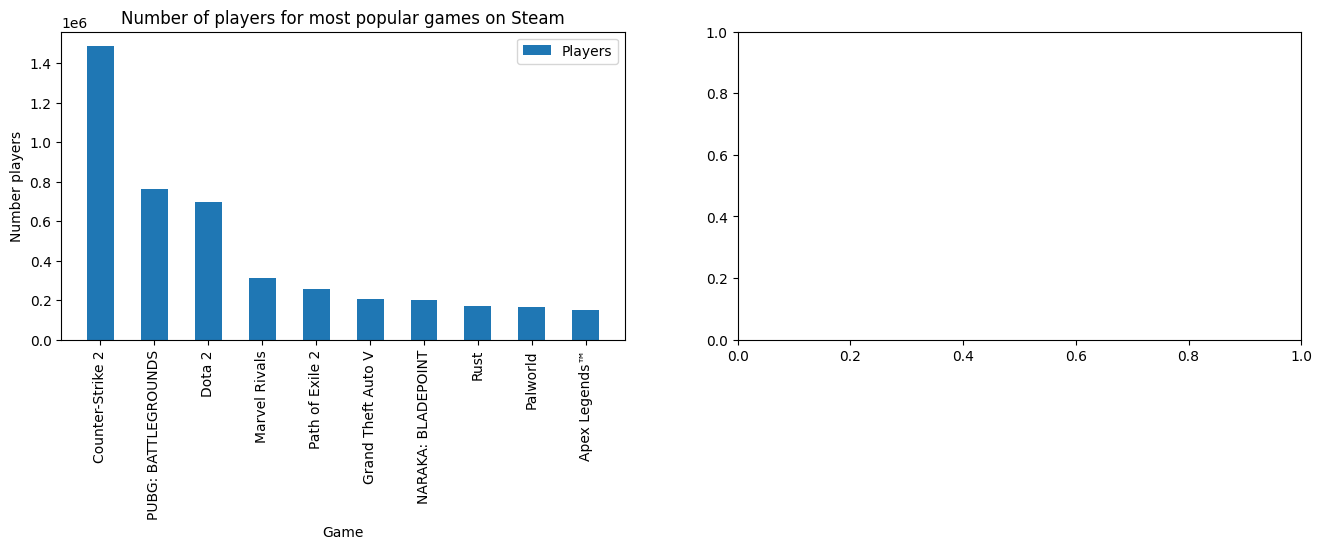

In [97]:
import matplotlib.pyplot as plt

x = top10_games['Name'].iloc[0:4]
y = top10_games['Current Players'].iloc[0:4]

fig, axes = plt.subplots(1,2, figsize=(16,4))

axes[0].bar(top10_games['Name'], top10_games['Current Players'], label="Players", width=0.5)
axes[0].set_title('Number of players for most popular games on Steam')
axes[0].set_xlabel("Game")
axes[0].set_ylabel('Number players')
axes[0].tick_params(axis='x', rotation=90)
axes[0].legend()

plt.savefig('figures/steam_exercise.png')